In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches
import plotnine as p9

In [2]:
p9.options.dpi=300
plt.rcParams['svg.fonttype']='none'

In [3]:
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=300)

In [4]:
from scipy.spatial.distance import pdist, squareform
import scipy.stats

In [5]:
import pingouin

In [7]:
import seaborn as sns


In [8]:
from statannotations.Annotator import Annotator


In [9]:
sns.set_theme(font_scale=0.5)
sns.set_style(style='whitegrid')

In [10]:
combined_adata=sc.read_h5ad(projectdir+'Anndata/T0T3T5Clone1_combined.h5ad')

In [11]:
progeny_df=pd.read_csv(projectdir+'Anndata/T0T3T5Clone1_combined_progenyResults.csv',header=0,index_col=0)

In [12]:
progeny_df.index=progeny_df.index.str.replace('.','-')

/gstore/home/wub31/.conda/envs/scanpy_Mar2022_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [13]:
combined_adata.obs=combined_adata.obs.merge(progeny_df,left_index=True,right_index=True)

In [14]:
df_resistant=combined_adata.obs[combined_adata.obs['Lineage_assigned']=='GENBC0283767']

In [15]:
df_resistant.replace('Resist_clone1','D90',inplace=True)

/gstore/home/wub31/.conda/envs/scanpy_Mar2022_env/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
df_resistant[['cell_bc','sample','aliquot','TGFb','PI3K','MAPK','EGFR']].to_csv(data_dir+'Fig3f.csv',header=True,index=False)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

D0 vs. D10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:7.341e-02 U_stat=1.566e+03
D10 vs. D20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.623e-05 U_stat=5.051e+03
D20 vs. D90: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.452e-150 U_stat=4.297e+04


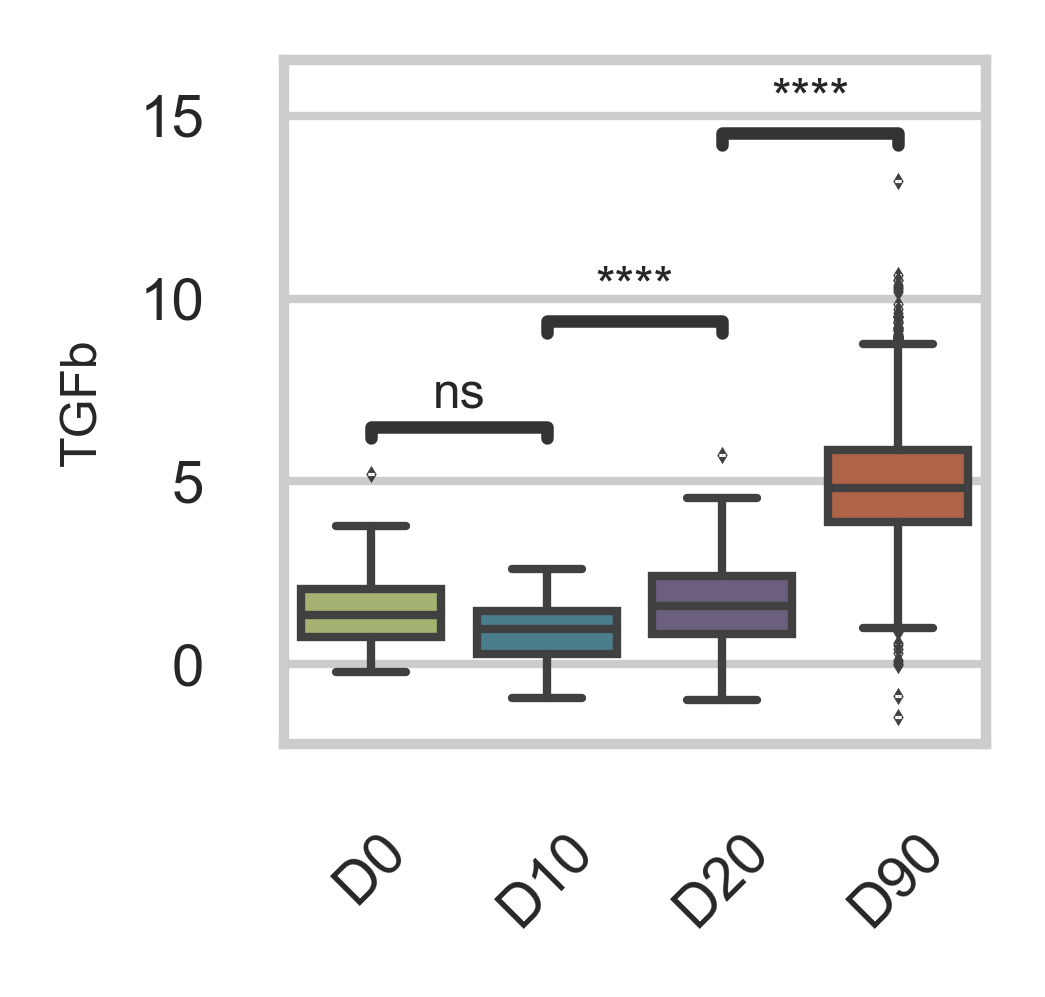

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(1.5,1.5)
palette={'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}
ax = sns.boxplot(data=df_resistant, x='sample',y='TGFb', order=['D0','D10', 'D20','D90'],palette=palette,saturation = 0.5,fliersize = 0.1,linewidth = 1)
annot = Annotator(ax, [("D0", "D10"), ("D10", "D20"), ("D20", "D90")], data=df_resistant, x='sample',y='TGFb')
annot.configure(test='Mann-Whitney',comparisons_correction="Bonferroni", text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.savefig('TGFb.svg', dpi=300, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

D0 vs. D10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:6.780e-10 U_stat=2.160e+03
D10 vs. D20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:3.760e-08 U_stat=1.194e+04
D20 vs. D90: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.074e-160 U_stat=2.155e+04


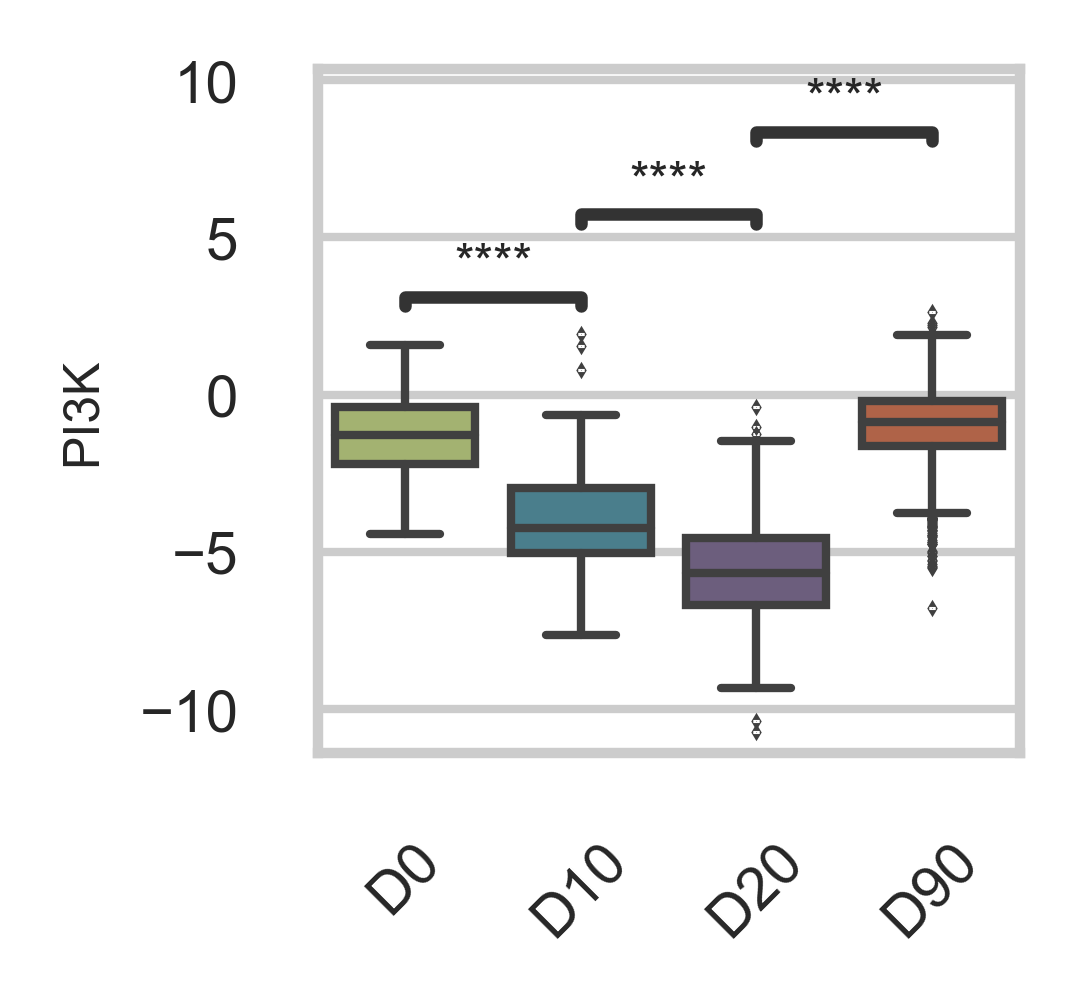

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(1.5,1.5)
palette={'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}
ax = sns.boxplot(data=df_resistant, x='sample',y='PI3K', order=['D0','D10', 'D20','D90'],palette=palette,saturation = 0.5,fliersize = 0.1,linewidth = 1)
annot = Annotator(ax, [("D0", "D10"), ("D10", "D20"), ("D20", "D90")], data=df_resistant, x='sample',y='PI3K')
annot.configure(test='Mann-Whitney',comparisons_correction="Bonferroni", text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation=45)
plt.savefig('PI3K.svg', dpi=300, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

D0 vs. D10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.791e-17 U_stat=2.476e+03
D10 vs. D20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:5.024e-01 U_stat=7.183e+03
D20 vs. D90: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.604e-130 U_stat=8.510e+04


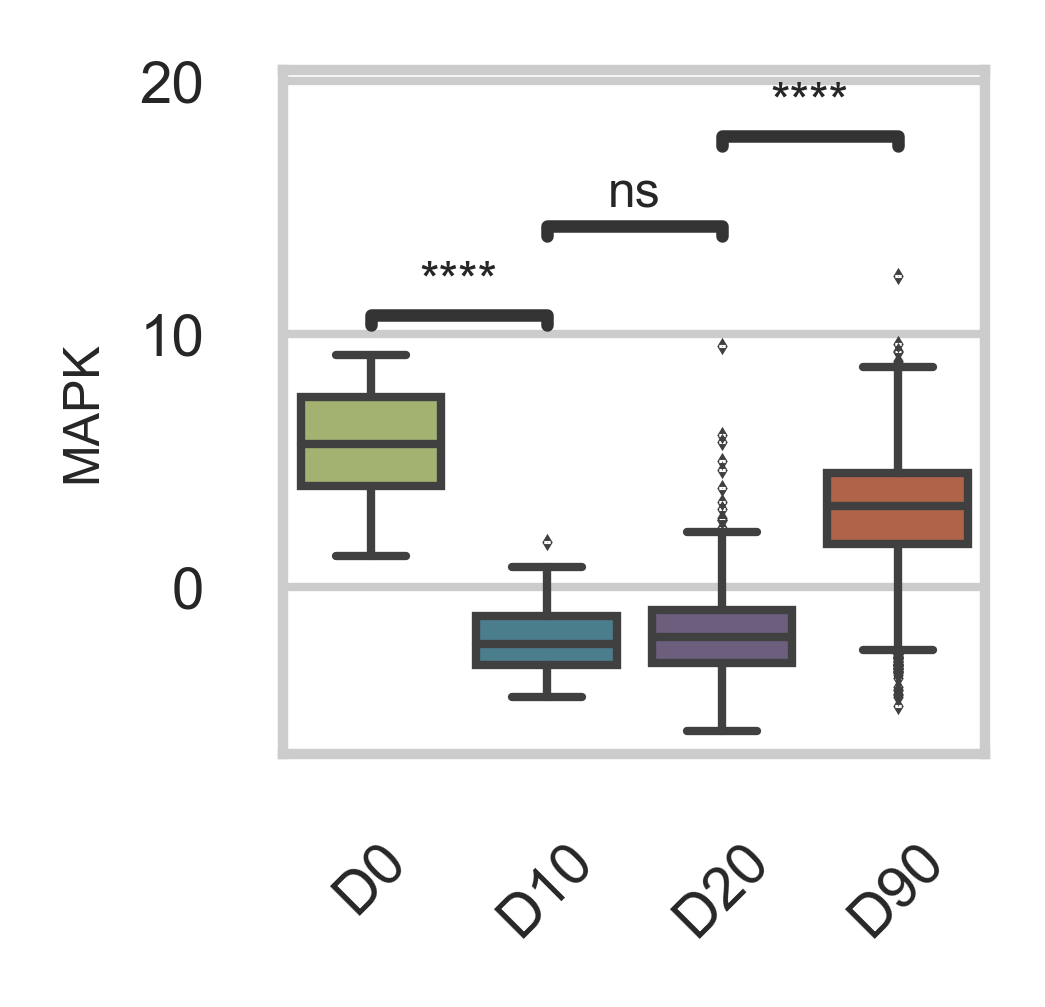

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(1.5,1.5)
palette={'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}
ax = sns.boxplot(data=df_resistant, x='sample',y='MAPK', order=['D0','D10', 'D20','D90'],palette=palette,saturation = 0.5,fliersize = 0.1,linewidth = 1)
annot = Annotator(ax, [("D0", "D10"), ("D10", "D20"), ("D20", "D90")], data=df_resistant, x='sample',y='MAPK')
annot.configure(test='Mann-Whitney',comparisons_correction="Bonferroni", text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation=45)
plt.savefig('MAPK.svg', dpi=300, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

D0 vs. D10: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.637e-16 U_stat=2.447e+03
D10 vs. D20: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:4.511e-12 U_stat=3.351e+03
D20 vs. D90: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.105e-119 U_stat=1.099e+05


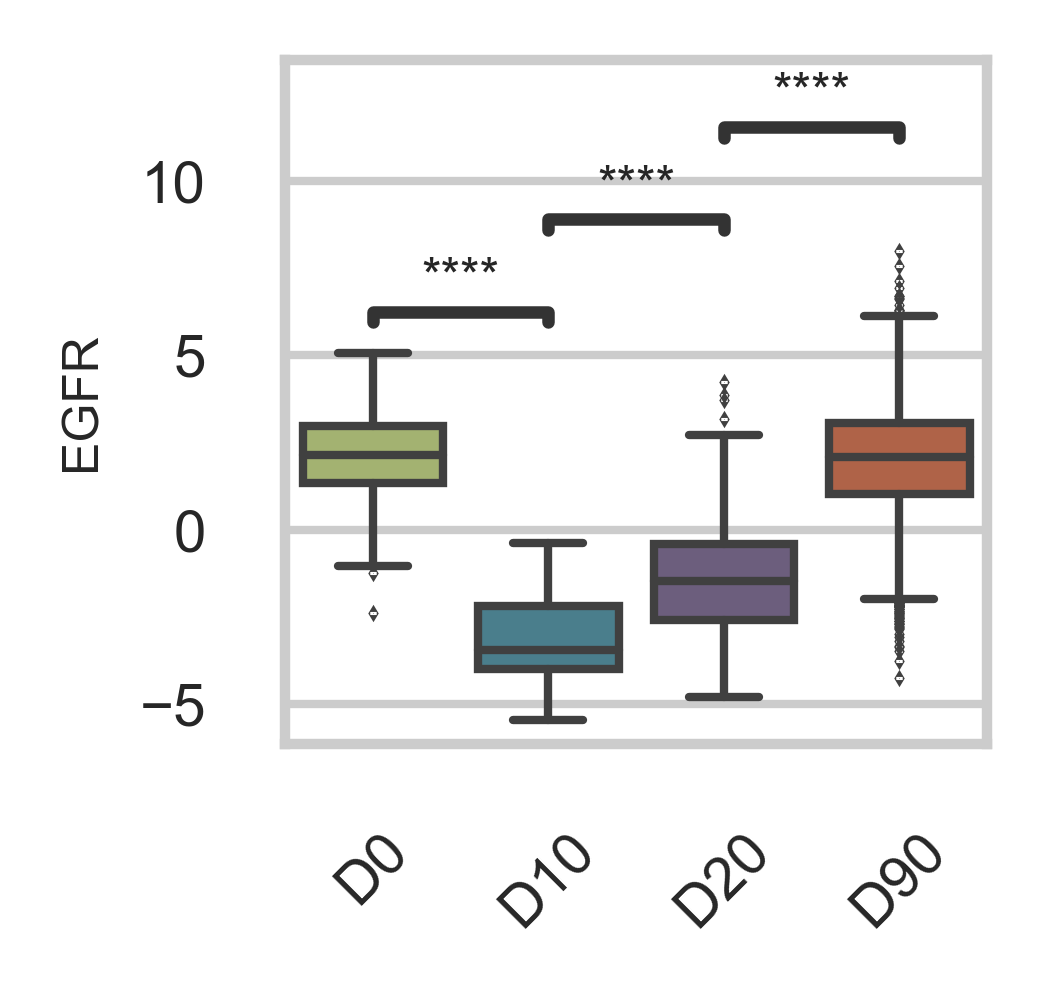

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(1.5,1.5)
palette={'D0':'#B5D251','D10':'#2992AD','D20':'#6A4E8C','D90':'#E24B15'}
ax = sns.boxplot(data=df_resistant, x='sample',y='EGFR', order=['D0','D10', 'D20','D90'],palette=palette,saturation = 0.5,fliersize = 0.1,linewidth = 1)
annot = Annotator(ax, [("D0", "D10"), ("D10", "D20"), ("D20", "D90")], data=df_resistant, x='sample',y='EGFR')
annot.configure(test='Mann-Whitney',comparisons_correction="Bonferroni", text_format='star', loc='inside', verbose=2)
annot.apply_test()
ax, test_results = annot.annotate()
plt.legend([],[], frameon=False)
plt.xlabel('')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.xticks(rotation=45)
plt.savefig('EGFR.svg', dpi=300, bbox_inches='tight')